# Titanic Passenger Survival Analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("# of passengers in dataset are:", len(dataset))

# of passengers in dataset are: 891


## Data Visualization
Analyze the Data
Plot to check how many passenger survived

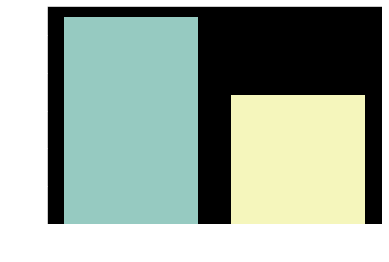

In [4]:
sns.countplot(dataset['Survived'])

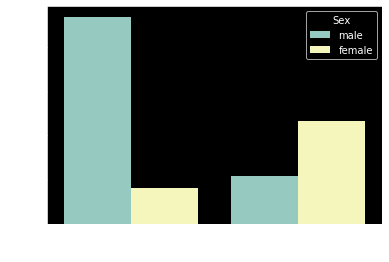

In [5]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

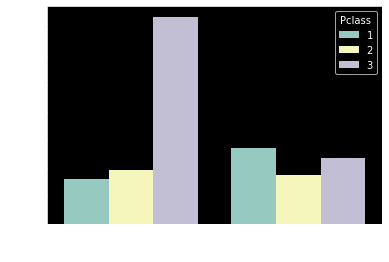

In [6]:
# Passenger class
sns.countplot(dataset['Survived'], hue=dataset['Pclass'])

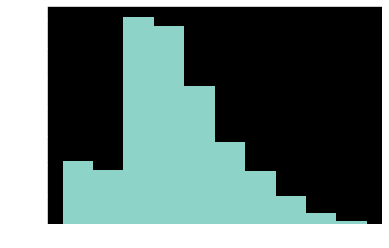

In [7]:
# Age distribution
dataset['Age'].plot.hist()

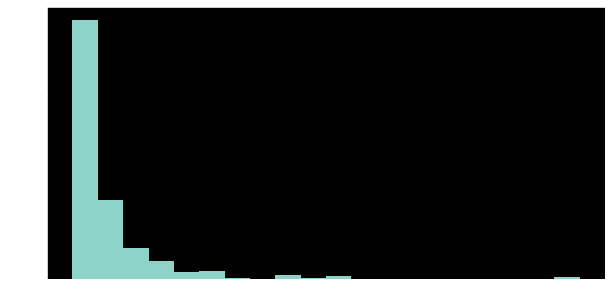

In [8]:
# Plotting Fare
dataset['Fare'].plot.hist(bins=20, figsize=(10, 5))

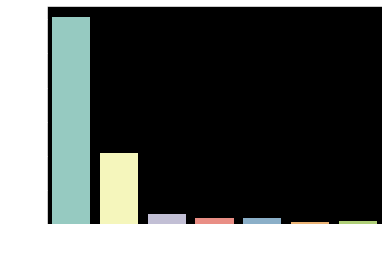

In [9]:
# Plot SibSp
sns.countplot(dataset['SibSp'])


## Data Preprocessing
Data Wrangling (Data cleaning)
remove all Nan value

In [10]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

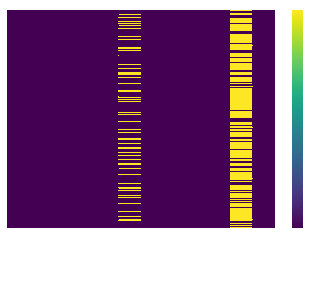

In [12]:
# Plot Heatmap and visulize null values

sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

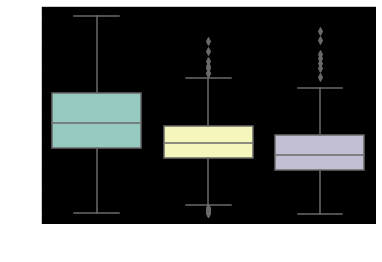

In [13]:
sns.boxplot(x='Pclass', y='Age', data=dataset)

Passenger travelling in 1st class and 2nd class teds to 
be older than 3rd class


You can drop the missing value or fill some other value
which is called 'cumputation'

Cabin colomn has more Nan value so we can drop it

In [14]:
dataset.drop('Cabin', axis=1, inplace=True)

In [15]:
dataset.dropna(inplace=True)

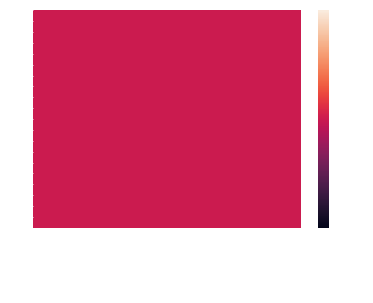

In [16]:
sns.heatmap(dataset.isnull())

### Encoding Categorical Features

In [17]:
pd.get_dummies(dataset['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [18]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [19]:
pclass = pd.get_dummies(dataset['Pclass'], drop_first=True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [20]:
embarked = pd.get_dummies(dataset['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [21]:
dataset.drop(['Sex', 'Pclass', 'PassengerId', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
dataset = pd.concat([dataset, sex, pclass, embarked], axis=1)
dataset

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,0,1,1,0
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [22]:
X = dataset.drop('Survived', axis=1).values
y = dataset['Survived'].values

### Splitting into train and test sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.22219025, -0.56508043, -0.52601834, ...,  1.03266163,
         4.76595066, -1.87810349],
       [-0.06156053, -0.56508043, -0.52601834, ...,  1.03266163,
        -0.20982173,  0.53245202],
       [ 2.20844568,  0.45452122,  0.5982612 , ..., -0.96837141,
        -0.20982173,  0.53245202],
       ...,
       [-0.13249822, -0.56508043,  0.5982612 , ...,  1.03266163,
        -0.20982173,  0.53245202],
       [-0.06156053, -0.56508043, -0.52601834, ...,  1.03266163,
        -0.20982173,  0.53245202],
       [ 0.00937717,  0.45452122,  0.5982612 , ...,  1.03266163,
        -0.20982173,  0.53245202]])

## Analysis with Logistic Regression

### Fitting logistic regression to training set

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting Test set results

In [26]:
y_pred = model.predict(X_test)

In [27]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[122,  20],
       [ 19,  53]])

In [28]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.87      0.86      0.86       142
           1       0.73      0.74      0.73        72

    accuracy                           0.82       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



In [29]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8177570093457944

## Analysis with DecisionTree Classification

### Fitting DecisionTree to training set

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Predicting Test set results

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[113,  29],
       [ 19,  53]])

In [33]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.86      0.80      0.82       142
           1       0.65      0.74      0.69        72

    accuracy                           0.78       214
   macro avg       0.75      0.77      0.76       214
weighted avg       0.79      0.78      0.78       214



In [34]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7757009345794392

## Analysis with Random Forest Classifier

### Fitting Random Forest Classifier to training set

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion='entropy',
                                    random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting Test set results

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[123,  19],
       [ 19,  53]])

In [38]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.87      0.87      0.87       142
           1       0.74      0.74      0.74        72

    accuracy                           0.82       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



In [39]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.822429906542056

In [40]:
# Feature Importance

features = list(dataset.drop('Survived', axis=1).columns)
importances = classifier.feature_importances_
for pair in zip(features, importances):
    print("{:<20} {}".format(*pair))

Age                  0.31462733295239076
SibSp                0.05319661863444746
Parch                0.0394547630916312
Fare                 0.2726950029090556
male                 0.20222456369744618
2                    0.020719386839919994
3                    0.06491617322309345
Q                    0.008276352200997532
S                    0.023889806451017827


## Analysis with SVM

### Fitting SVM to training set

In [41]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Predicting Test set results

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  30],
       [ 31,  41]])

In [44]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.78      0.79      0.79       142
           1       0.58      0.57      0.57        72

    accuracy                           0.71       214
   macro avg       0.68      0.68      0.68       214
weighted avg       0.71      0.71      0.71       214



In [45]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7149532710280374